In [1]:
!pip install ppscore

Data Preprocessing and Feature Engineering in Machine Learning
Objective:
This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.
Dataset:
Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.
Tasks:
1. Data Exploration and Preprocessing:
Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
Handle missing values as per the best practices (imputation, removal, etc.).
Apply scaling techniques to numerical features:
Standard Scaling
Min-Max Scaling
Discuss the scenarios where each scaling technique is preferred and why.
2. Encoding Techniques:
Apply One-Hot Encoding to categorical variables with less than 5 categories.
Use Label Encoding for categorical variables with more than 5 categories.
Discuss the pros and cons of One-Hot Encoding and Label Encoding.
3. Feature Engineering:
Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.
4. Feature Selection:
Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler ,MinMaxScaler ,LabelEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps
import warnings as warn
warn.filterwarnings('ignore')

## **1. Data Exploration and Preprocessing**

In [26]:
#load dataset
df=pd.read_csv('adult_with_headers.csv')
df.shape

(8965, 15)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8965 entries, 0 to 8964
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             8965 non-null   int64 
 1   workclass       8965 non-null   object
 2   fnlwgt          8965 non-null   int64 
 3   education       8965 non-null   object
 4   education_num   8965 non-null   int64 
 5   marital_status  8965 non-null   object
 6   occupation      8965 non-null   object
 7   relationship    8965 non-null   object
 8   race            8965 non-null   object
 9   sex             8965 non-null   object
 10  capital_gain    8965 non-null   int64 
 11  capital_loss    8965 non-null   int64 
 12  hours_per_week  8965 non-null   int64 
 13  native_country  8965 non-null   object
 14  income          8965 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.0+ MB


In [28]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [29]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [30]:
df.nunique()


,0
age,71
workclass,9
fnlwgt,7749
education,16
education_num,16
marital_status,7
occupation,15
relationship,6
race,5
sex,2


In [31]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [32]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,8965.000000,8.965000e+03,8965.000000,8965.000000,8965.000000,8965.000000
mean,38.442722,1.902449e+05,10.076297,1070.066815,89.187730,40.547909
std,13.574919,1.060791e+05,2.543592,7341.281254,404.037313,12.325320
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.179270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.786150e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.384150e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.226583e+06,16.000000,99999.000000,4356.000000,99.000000


In [33]:
# Unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Unique values in education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Unique values in marital_status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
Unique values in occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Unique values in relationship: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Unique values in race: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Ind

In [34]:
# Scaling the data

In [35]:
num_col=[i for i in df.columns if df[i].dtype!='O']
num_col

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [36]:
#standardization , range values between -3 to +3

#numerical columns
num_col=df.select_dtypes(include=[np.number]).columns
df_num=df[num_col]
#df_num

#standardization
sca=StandardScaler()
df_sca=sca.fit_transform(df_num)
df_sca

array([[ 0.04105434, -1.06274651,  1.14950304,  0.15038175, -0.22075363,
        -0.04445638],
       [ 0.85141744, -1.0081144 ,  1.14950304, -0.14576836, -0.22075363,
        -2.23519111],
       [-0.03261503,  0.23946811, -0.42316412, -0.14576836, -0.22075363,
        -0.04445638],
       ...,
       [-0.47463127, -0.21413398,  1.93583662,  1.90085504, -0.22075363,
         0.76692685],
       [ 3.79819236, -1.06711142, -0.42316412, -0.14576836, 10.5610302 ,
        -0.04445638],
       [-1.21132499,  0.08504637,  1.14950304, -0.14576836, -0.22075363,
        -0.85583961]])

In [37]:
#normalization  range value between 0 to 1
scaler=MinMaxScaler()
d_mm=scaler.fit_transform(df_num)
d_mm


array([[0.30136986, 0.0482191 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.05301914, 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.16263322, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.20547945, 0.1227792 , 0.93333333, 0.1502415 , 0.        ,
        0.5       ],
       [1.        , 0.04783559, 0.53333333, 0.        , 1.        ,
        0.39795918],
       [0.06849315, 0.14906554, 0.8       , 0.        , 0.        ,
        0.29591837]])

1. Min-Max Scaling (Normalization)
Formula:

𝑋
scaled=𝑋−𝑋min/𝑋max−𝑋minX

 This scales the values to a fixed range, typically [0, 1].

Preferred Scenarios:

Algorithms Sensitive to Magnitude:

* Used in models like K-Nearest Neighbors (KNN), SVM (with RBF kernel), or Neural Networks, where the magnitude of the features significantly influences performance.


Features with Known Range:

Useful when the data naturally falls into a known range, such as percentages or pixel intensities (e.g., images).

Interpretability in [0, 1] Range:

Normalizing to [0, 1] makes the feature values easier to interpret in certain applications, such as when probabilities are calculated.

Why?

Min-Max Scaling preserves the shape of the data distribution (relative distances remain proportional) while ensuring all features are in a uniform range.


2. Standard Scaling (Z-Score Normalization)
Formula:

𝑋scaled=𝑋−𝜇 /𝜎

This centers the data around a mean of 0 and standard deviation of 1.

Preferred Scenarios:

Gaussian-Like Distributions:

Standard scaling is most effective when features follow (or are close to) a normal distribution because it standardizes the distribution.

Linear Models:

Algorithms like Linear Regression, Logistic Regression, and SVM (Linear kernel) benefit because the coefficients are sensitive to the scale of input features.

Principal Component Analysis (PCA):

PCA involves maximizing variance, which is sensitive to feature magnitude. Standard scaling ensures that all features contribute equally.

Clustering Algorithms:

Algorithms like K-Means require features to be scaled for accurate computation of centroids and distances.

Why?

Standard scaling ensures that features have a uniform contribution by removing biases caused by different means or variances.

## **2. Encoding Techniques**

In [38]:
#Onehot encoding
df['workclass'] = df['workclass'].astype('category')
df['education'] = df['education'].astype('category')
df['marital_status'] = df['marital_status'].astype('category')
df['occupation'] = df['occupation'].astype('category')

df['workclass'] = df['workclass'].cat.codes
df['education'] = df['education'].cat.codes
df['marital_status'] = df['marital_status'].cat.codes
df['occupation'] = df['occupation'].cat.codes


In [39]:
# Convert object columns to category for optimization
for col in ['relationship', 'race', 'sex', 'native_country', 'income']:
    df[col] = df[col].astype('category')

# Downcast numerical columns
df['capital_gain'] = pd.to_numeric(df['capital_gain'], downcast='integer')
df['capital_loss'] = pd.to_numeric(df['capital_loss'], downcast='integer')
df['hours_per_week'] = pd.to_numeric(df['hours_per_week'], downcast='integer')

print("Optimized Memory Usage:")
print(df.info())

Optimized Memory Usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8965 entries, 0 to 8964
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             8965 non-null   int64   
 1   workclass       8965 non-null   int8    
 2   fnlwgt          8965 non-null   int64   
 3   education       8965 non-null   int8    
 4   education_num   8965 non-null   int64   
 5   marital_status  8965 non-null   int8    
 6   occupation      8965 non-null   int8    
 7   relationship    8965 non-null   category
 8   race            8965 non-null   category
 9   sex             8965 non-null   category
 10  capital_gain    8965 non-null   int32   
 11  capital_loss    8965 non-null   int16   
 12  hours_per_week  8965 non-null   int8    
 13  native_country  8965 non-null   category
 14  income          8965 non-null   category
dtypes: category(5), int16(1), int32(1), int64(3), int8(5)
memory usage: 352.4 KB
None


In [40]:
df=df.copy()
le=LabelEncoder()

# Select columns to apply label encoding using iloc
col_enc = df.iloc[:, [7,8, 9, 13, 14]]
#selected columns are relationship,race,sex,native country, income

# Apply LabelEncoder to the selected columns
for col in col_enc.columns:
    df.iloc[:, df.columns.get_loc(col)] = le.fit_transform(df[col])

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,38,1
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,38,1
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,38,1
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,38,1
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,1


In [41]:
df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
8960,57,2,339163,15,10,6,1,4,4,0,0,0,40,25,1
8961,59,6,124771,9,13,2,5,0,4,1,0,0,30,38,1
8962,32,4,167531,14,15,2,10,5,1,0,15024,0,50,38,2
8963,90,0,77053,11,9,6,0,1,4,0,0,4356,40,38,1
8964,22,4,199266,9,13,4,4,1,4,0,0,0,30,38,0


1.One-Hot Encoding
One-Hot Encoding creates binary columns (0s and 1s) for each category of a categorical variable.

*Pros*

1. No Ordinal Relationship Assumption:

   * It does not assume any ordinal relationship between categories, making it suitable for nominal (unordered) data.

2. Prevents Misleading Relationships:

   * Since each category is represented in its own column, it avoids misleading the model into interpreting any numeric relationship or hierarchy between categories.

3. Widely Supported:

   * Many ML algorithms (like linear regression and tree-based models) perform well with OHE because it ensures equal weight for all categories.

*Cons*

1. High Dimensionality:

   * For variables with many categories, One-Hot Encoding can create a large number of additional columns, which increases memory usage and computational cost.

2. Curse of Dimensionality:

   * The large number of binary columns can lead to sparse data, which might degrade the performance of certain models, especially those sensitive to high dimensionality (e.g., k-Nearest Neighbors).

3. Difficult to Handle New Categories:

   * If new categories appear in the test set that weren’t present in the training data, they cannot be handled easily.


2. Label Encoding
Label Encoding assigns a unique integer to each category.

*Pros*

1. Simplicity:

    * Easy to implement, as it replaces categories with integers.

2. Memory Efficient:

    * Label Encoding does not increase the dimensionality of the dataset, making it more memory-efficient than One-Hot Encoding, especially for features with many categories.

3. Works Well for Tree-Based Models:

    * Algorithms like Decision Trees, Random Forests, and XGBoost are insensitive to the numerical ordering of labels, so Label Encoding works well for them.

*Cons*

1. Assumes Ordinal Relationship:

   * Label Encoding implies an ordinal relationship between categories (e.g., "Red" < "Green" < "Blue"), which might mislead models that consider the numerical ordering significant (e.g., linear regression or SVM).

2. Not Suitable for Nominal Data:

   *  For purely categorical data with no intrinsic order, Label Encoding can introduce spurious relationships that degrade model performance.

3. Model Interpretation Becomes Harder:

   * The numerical representation can be harder to interpret compared to One-Hot Encoding, where each binary column directly represents a category.

## **3. Feature Engineering**

In [42]:
# Feature 1: Age Group
df['age_group'] = pd.cut(
    df['age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Middle-aged', 'Senior', 'Elder']
)

# Feature 2: Capital Difference
df['capital_difference'] = df['capital_gain'] - df['capital_loss']

# Verify new features
print("New Features:\n", df[['age', 'age_group', 'capital_difference']].head())


New Features:
    age    age_group  capital_difference
0   39  Middle-aged                2174
1   50       Senior                   0
2   38  Middle-aged                   0
3   53       Senior                   0
4   28  Middle-aged                   0


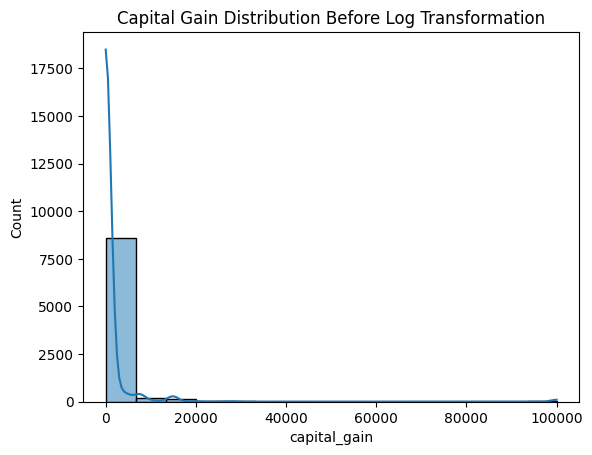

In [43]:
# Visualize skewness of capital_gain
sns.histplot(df['capital_gain'], kde=True)
plt.title("Capital Gain Distribution Before Log Transformation")
plt.show()

In [44]:
# Apply log transformation
df['capital_gain_log'] = np.log1p(df['capital_gain'])  # log(1 + x) avoids issues with log(0)

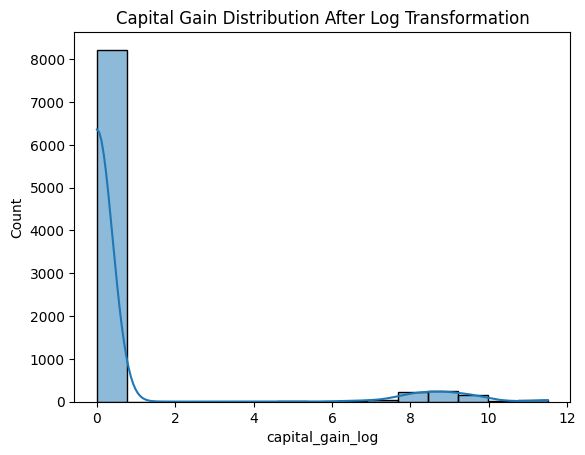

In [45]:
# Visualize after transformation
sns.histplot(df['capital_gain_log'], kde=True)
plt.title("Capital Gain Distribution After Log Transformation")
plt.show()

 Justification for Applying the Log Transformation

* Handling Skewness: A log transformation will reduce the right-skew of capital_gain, making it more symmetric and improving the performance of machine learning models that assume normally distributed data.

* Enhancing Model Performance: With less skewness, models like linear regression, logistic regression, and tree-based models (e.g., Random Forest, XGBoost) will have an easier time capturing relationships between features and the target variable, leading to better generalization.

* Better Interpretation: Log transformations are often used for features that grow exponentially, like income, population, or capital gains. The transformed variable is easier to interpret, as it represents relative rather than absolute changes.

## **Feature Selection**

In [46]:
# Select numerical columns for outlier detection
numerical_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
iso = IsolationForest(contamination=0.05, random_state=42)

# Fit and predict outliers
df['Outlier'] = iso.fit_predict(df[numerical_features])

# Remove outliers
df_cleaned = df[df['Outlier'] == 1].drop(columns=['Outlier'])

print("Shape Before Outlier Removal:", df.shape)
print("Shape After Outlier Removal:", df_cleaned.shape)


Shape Before Outlier Removal: (8965, 19)
Shape After Outlier Removal: (8516, 18)


In [47]:
# Compute PPS matrix
pps_matrix = pps.matrix(df_cleaned)[['x', 'y', 'ppscore']].pivot(
    index='x', columns='y', values='ppscore'
)


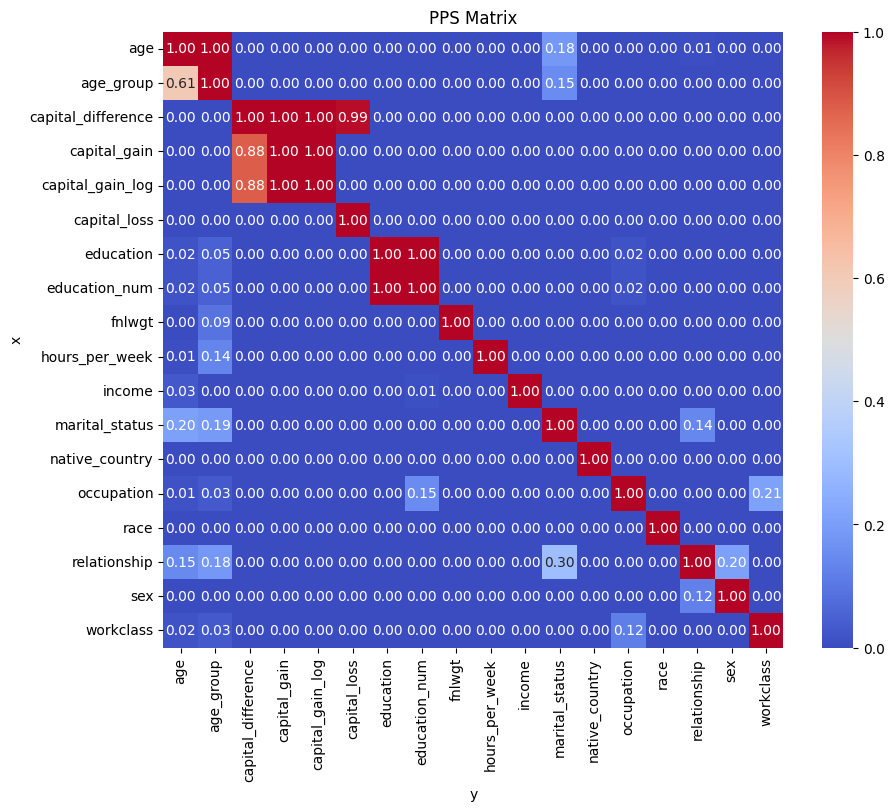

In [48]:
# Visualize PPS matrix
plt.figure(figsize=(10, 8))
sns.heatmap(pps_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("PPS Matrix")
plt.show()

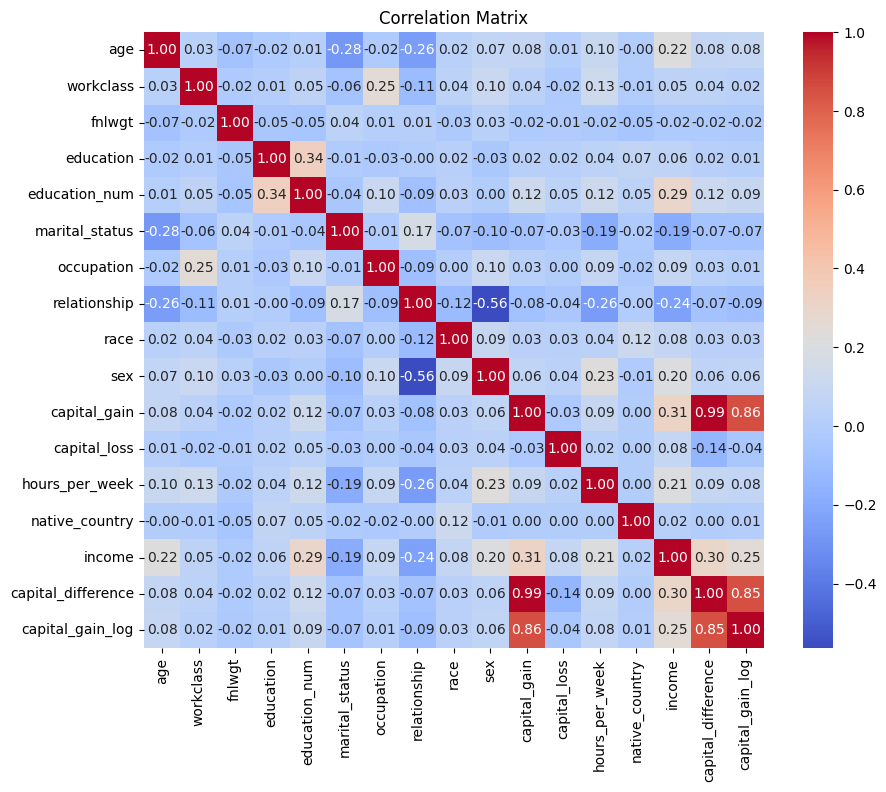

In [49]:
# Compare with Correlation Matrix
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Analysis of PPS (Predictive Power Score) Matrix vs Correlation Matrix

1. Key Observations from the PPS Matrix

The Predictive Power Score (PPS) measures the strength of a predictive relationship between features. Unlike correlation, it can capture non-linear relationships and is directional (e.g., feature A's predictive power for B might differ from B's power for A).

Key highlights:

* age → age_group: High PPS value (1.0). This is expected since age_group was derived from age.

* capital_gain → capital_gain_log: High PPS value (0.87). This reflects the transformation applied to reduce skewness.

* marital_status → relationship: Moderate PPS value (0.32). This is because marital status influences relationship roles (e.g., "Husband" or "Wife").

* hours_per_week → income: Low PPS value (0.03). While there is some relationship (e.g., longer working hours may indicate higher income), it is not strong in isolation.

* Most other pairs show very low PPS values (close to 0.0), suggesting weak predictive relationships between features.

2. Key Observations from the Correlation Matrix

Correlation measures linear relationships between features, without considering directionality or non-linear dependencies.

Key highlights:

* capital_gain vs capital_gain_log: Strong positive correlation (0.87). This aligns with the PPS findings for the same pair.

* capital_gain vs capital_difference: Very high correlation (0.99), as capital_difference combines capital_gain and capital_loss.

* marital_status vs relationship: Negative correlation (-0.25). This aligns with the PPS result but fails to capture the predictive aspect between the two features.

* sex vs relationship: Moderate negative correlation (-0.58), showing that gender influences relationship roles (e.g., "Husband" is associated with "Male").

* Many features, such as race, native_country, and fnlwgt, have very low correlations with others.

In [50]:
# end